<a href="https://colab.research.google.com/github/LuizP/Portfolio/blob/main/5minMLPTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.read_excel('/content/drive/MyDrive/Projeto Cnpq/dados/XdadosLuiz5min.xlsx')
Y = pd.read_excel('/content/drive/MyDrive/Projeto Cnpq/dados/YdadosLuiz5min.xlsx', engine='openpyxl')

In [ ]:
X=X.drop[X.head(74717)]

In [ ]:
X = df_train_30_dropS4
from sklearn import preprocessing
X1 = preprocessing.normalize(X, norm='l2', axis=0, copy=True, return_norm=False)
X2=pd.DataFrame(X1)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
y_sm = pd.Series(y_sm)
y_sm.value_counts()

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, Y, test_size=0.5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
import itertools
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
import math

from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
import itertools

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



In [ ]:
def get_auc_scores(clf1, X_train, X_test, y_train, y_test):
   #Prints the AUC scores for training and testing data and returns testing score
 
 y_train_score = clf1.predict_proba(X_train)[:, 1]
 y_test_score = clf1.predict_proba(X_test)[:, 1]
 auc_train = roc_auc_score(y_train, y_train_score)
 auc_test = roc_auc_score(y_test, y_test_score)
 print("Training AUC:", auc_train, "Testing AUC:", auc_test) 
 
 return y_test_score

def plot_roc_curve(y_test, y_test_score): #Plot ROC curve for testing data    
  fpr, tpr, n_threshold = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)
  #plt.figure()
  plt.figure(figsize=(6.93, 5), dpi=600) #size inches
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], 'r-')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("Taxa de Falso Positivo", fontsize=18)
  plt.ylabel("Taxa de Verdadeiros Positivos", fontsize=18)
  plt.title("Curva ROC", fontsize=18)
  plt.legend(loc='lower right')
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


results [[31454  5353]
 [ 3760 33204]]
accurayscore 0.8764690732130512
f1score 0.879331576647555
sensitivity1 0.8982794069905854
specificity1 0.8545657076099655
FPR 0.1454342923900345
FNR 0.10172059300941456


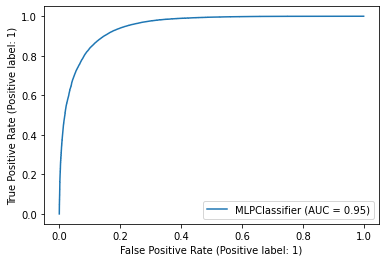

In [ ]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(solver='adam', alpha=0.0015, hidden_layer_sizes=(13, 5, 2))

clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
results = confusion_matrix(y_test,y_pred)
accurayscore = accuracy_score(y_test,y_pred);
f1score = f1_score(y_test,y_pred);
recallscore = recall_score(y_test,y_pred, average = 'binary');
precisionscore = precision_score(y_test,y_pred);

TP=results[1,1]; TN=results[0,0]; FP=results[0,1]; FN=results[1,0];

accurayscore = (TP+TN)/(TP+FN+TN+FP)
sensitivity1 = TP/(TP+FN)
specificity1 = TN/(TN+FP)
FPR = FP/(TN+FP)
FNR = FN/(TP+FN)

from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf1, X_test, y_test)

print('results', results) 
print('accurayscore', accurayscore)
print('f1score', f1score) 
print('sensitivity1', sensitivity1)
print('specificity1', specificity1)
print('FPR', FPR)
print('FNR', FNR)

In [ ]:
y_test_score = get_auc_scores(clf1, X_train, X_test, y_train, y_test)
plot_roc_curve(y_test, y_test_score)